<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 03
## Laboratorio Clase 04: Visualización Interactiva

### Instrucciones


* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* La escala es de 0 a 4 considerando solo valores enteros.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_cYY_lab_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.
* __La entrega es al final de esta clase.__

__Nombre__: Bernardo Recabarren

__Rol__: 201610004-0

In [1]:
import os
import numpy as np
import pandas as pd
import altair as alt

alt.themes.enable('opaque')  # Para quienes utilizan temas oscuros en Jupyter Lab

ThemeRegistry.enable('opaque')

## Ejercicio 1 (1 pto)

Volveremos a utilizar los datos de _European Union lesbian, gay, bisexual and transgender survey (2012)_, para ello los cargaremos tal como en el laboratorio anterior.

Utilizando `altair` realiza la siguiente visualización:

1. Filtra los datos tal de utilizar solo la pregunta con código `g5`, que corresponde a _All things considered, how satisfied would you say you are with your life these days? *_.
2. Debe ser un gráfico de barras horizontal tal que:
    1. Para cada grupo mostrar el porcentaje.
    2. Colorear por valor de la respuesta (recuerda que la pregunta `g5` tiene respuestas numéricas).
    3. Debe haber un gráfico por cada país. Hint: utiliza el encode `row`.

In [2]:
daily_life = (
    pd.read_csv(os.path.join("data", "LGBT_Survey_DailyLife.csv"))
    .query("notes != ' [1] '")
    .astype({"percentage": "int"})
    .drop(columns="notes")
    .rename(columns={"CountryCode": "country"})
)
daily_life.head()

,country,subset,question_code,question_label,answer,percentage
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,8
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly widespread,34
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly rare,45
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very rare,9
4,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Don`t know,4


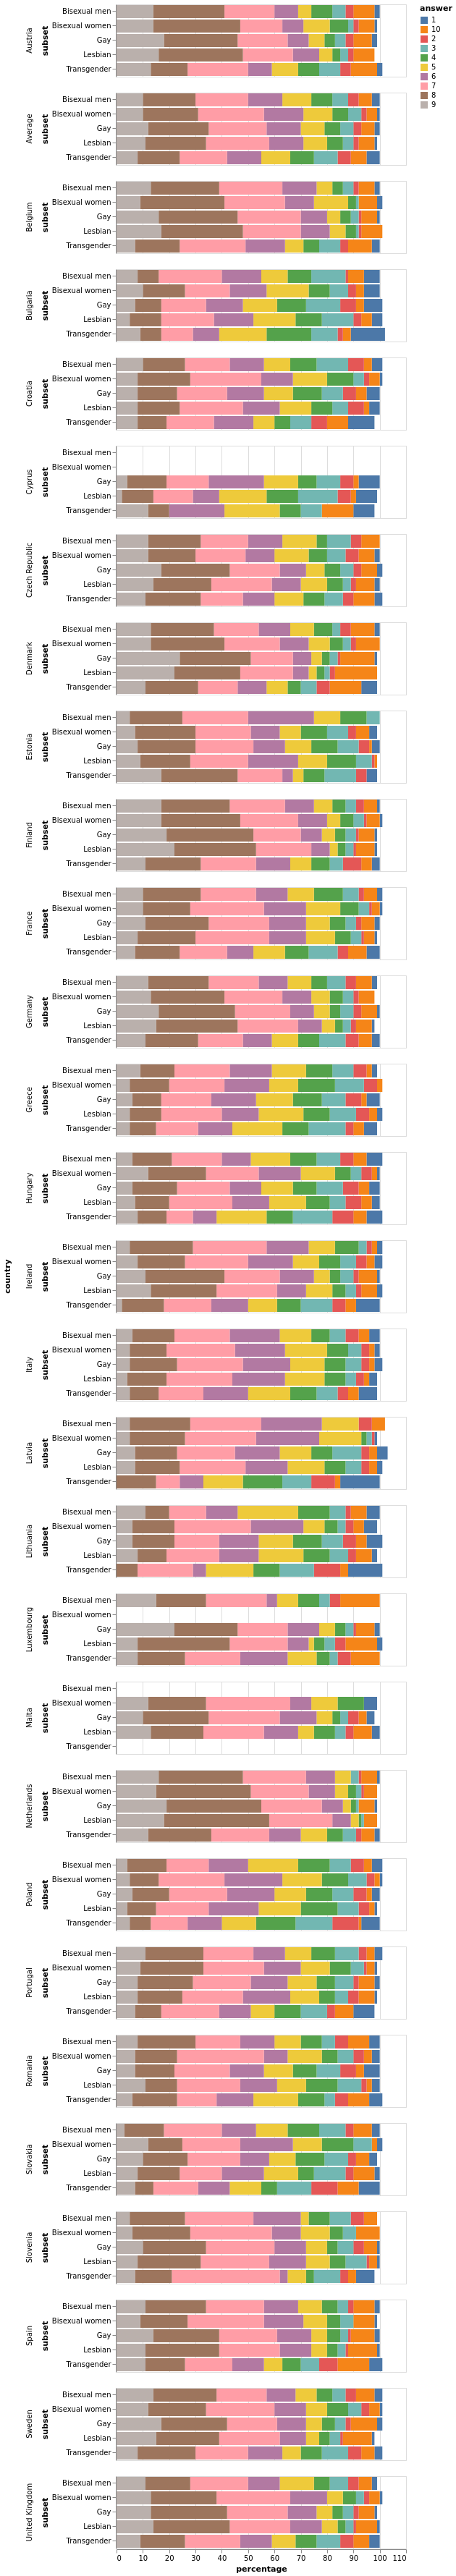

In [3]:
alt.Chart(daily_life.query("question_code == 'g5'")).mark_bar().encode(
    x='percentage:Q' ,
    y='subset' ,
    color='answer' , 
    row='country'
)

## Ejercicio 2 (1 pto)

Para esta parte utilizaremos un conjunto de datos de __Precios de Paltas__, extraído desde [Kaggle](https://www.kaggle.com/neuromusic/avocado-prices).

#### Context
_It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements._

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope... if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

#### Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

> The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* `Date` - The date of the observation
* `AveragePrice` - the average price of a single avocado
* `type` - conventional or organic
* `year` - the year
* `Region` - the city or region of the observation
* `Total` Volume - Total number of avocados sold
* `4046` - Total number of avocados with PLU 4046 sold
* `4225` - Total number of avocados with PLU 4225 sold
* `4770` - Total number of avocados with PLU 4770 sold

Veamos el conjunto de datos y formatémoslo con tal de aprovechar mejor la información

In [4]:
paltas_raw = pd.read_csv(os.path.join("data", "avocado.csv"), index_col=0)
paltas_raw.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
paltas = (
    paltas_raw.assign(
        dt_date=lambda x: pd.to_datetime(x["Date"], format="%Y-%m-%d")
    )
    .drop(columns=["Date", "year"])
)
    
paltas.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,dt_date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015-12-27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015-12-20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015-12-13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015-12-06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015-11-29


Haz un gráfico de líneas tal que:

* El eje horziontal corresponda a la fecha.
* El eje vertical al promedio de precio.
* El color sea por tipo de palta.

In [6]:
try:
    alt.Chart(paltas).mark_line().encode(
            x='dt_date:T' ,
            y='AveragePrice:Q' ,
            color='type:N'
        )
except:
    print("Exception?")

¿`MaxRowError`? ¿Qué es eso? Para todo el detalle puedes dirigirte [aquí](https://altair-viz.github.io/user_guide/faq.html). En lo que nos concierne, `altair` no solo genera los pixeles de un gráfico, si no que también guarda la data asociada a él. Este error es para advertir al usuario que los jupyter notebooks podrían utilizar mucha memoria. 

Una buena práctica en estos datos, es generar un archivo `json` con los datos y `altair` es capaz de leer la url directamente. El único inconveniente es que no detecta el tipo de dato automáticamente, por lo que siempre se debe decalrar.

Ejecuta la siguiente celda para generar el archivo `json`.

In [7]:
paltas_url = os.path.join("data", "paltas.json")
paltas.to_json(paltas_url, orient="records")

alt.data_transformers.enable('json')  # Para poder leer directamente la url de un archivo json.

DataTransformerRegistry.enable('json')

Vuelve a intentar generar el gráfico pero como argumento utiliza la url.

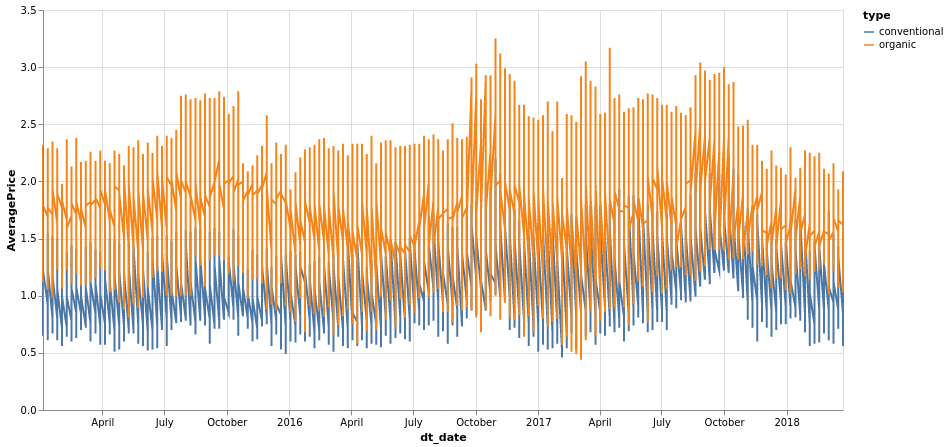

In [8]:
alt.Chart(paltas_url).mark_line().encode(
    x="dt_date:T",
    y="AveragePrice:Q",
    color="type:N"
).properties(
    width=800, 
    height=400 
)

## Ejercicio 3 (2 ptos)

GEnera un gráfico similar al del gráfico anterior, pero esta vez coloreando por región, es decir, un gráfico de líneas tal que:

* El eje horziontal corresponda a la fecha.
* El eje vertical al promedio de precio.
* El color sea por región.

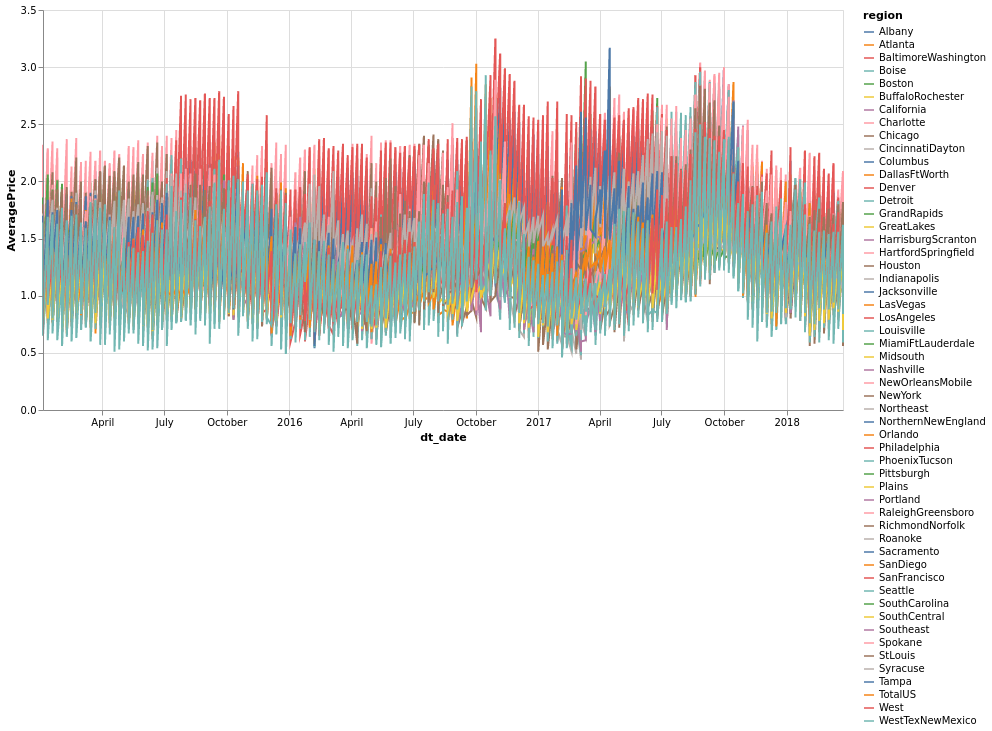

In [9]:
alt.Chart(paltas_url).mark_line().encode(
    x="dt_date:T",
    y="AveragePrice:Q",
    color="region:N"
).properties(
    width=800, 
    height=400 
)

¿Te parece adecuado y/o que entrega información útil?

Ahora, para mostrar la misma información, genera un mapa de calor.

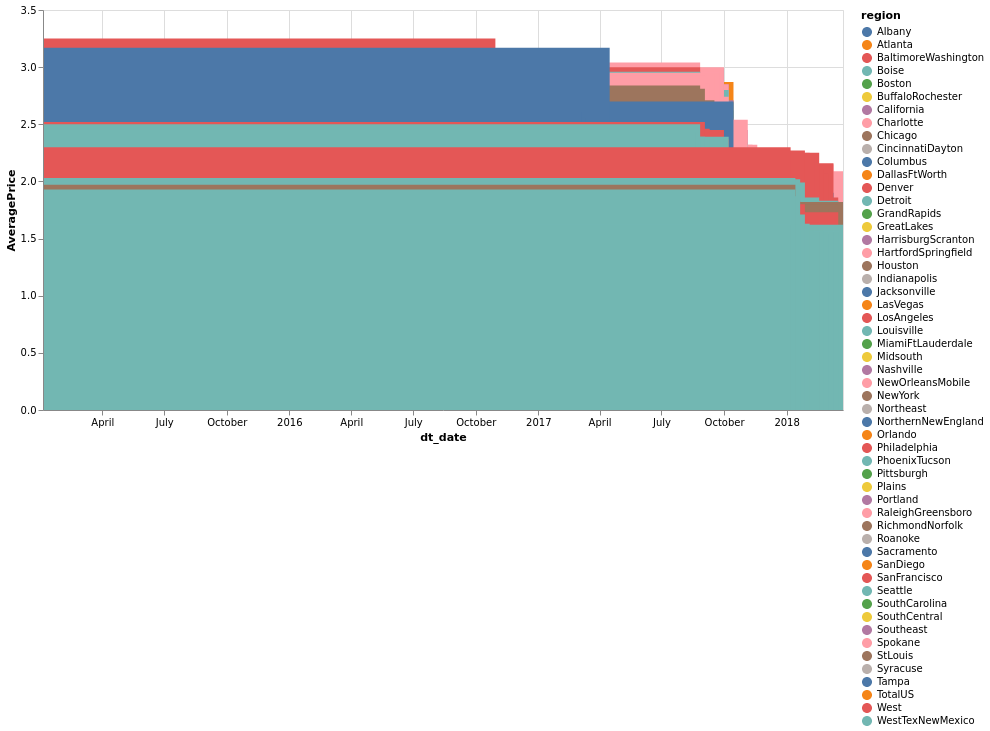

In [10]:
alt.Chart(paltas_url).mark_rect().encode(
    x="dt_date:T",
    y="AveragePrice:Q",
    color="region:N"
).properties(
    width=800, 
    height=400 
)